# Linear Regression

- we will cover assumptions
- example in python

1. What are Assumptions of Linear Regression?
Violations of assumptions of linear regression can lead to biased or inefficient estimates Assumptions:
- Linearity: The relationship between the dependent and independent variables is linear.
- Independence: The observations are independent of each other.
- Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
- Normality: The errors follow a normal distribution.
- No multicollinearity: The independent variables are not highly correlated with each other.
- No endogeneity: There is no relationship between the errors and the independent variables.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Define the true slope (coefficient) and intercept (constant term)
true_slope = 2.5
true_intercept = 5

# Generate random data for the independent variable (x)
num_samples = 100
x = np.random.rand(num_samples) * 10
noise = np.random.normal(loc=0, scale=2, size=num_samples)
y = x*true_slope + true_intercept + noise

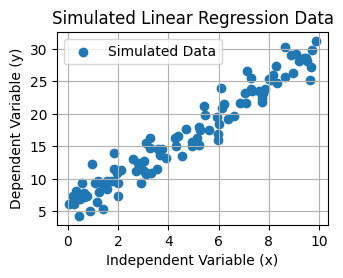

In [26]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

plt.scatter(x, y, label='Simulated Data')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Simulated Linear Regression Data')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# fit our linear model:
X = x.reshape(-1, 1)

# Step 3: Create the linear regression model
model = LinearRegression()

# Step 4: Fit the model to the data
model.fit(X, y)

# Step 5: Predict
y_pred = model.predict(X)


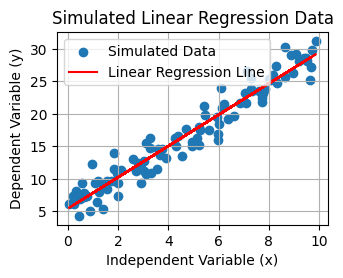

In [28]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

plt.scatter(x, y, label='Simulated Data')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Simulated Linear Regression Data')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
print(f"model coefficient: {model.coef_[0]}")

model coefficient: 2.4080453545753935


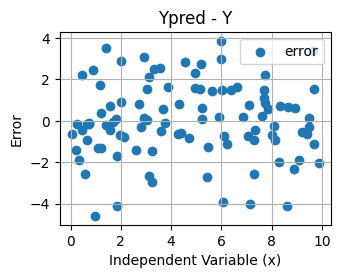

In [30]:
# Homoscadasticity Check - also can you do weighted regression then if it does not check out 
# The errors have constant variance 

errors = y_pred - y 
fig, ax = plt.subplots(figsize=(3.5, 2.5))
plt.scatter(x, errors, label='error')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Error')
plt.title('Ypred - Y')
plt.legend()
plt.grid(True)
plt.show()

What if error is not heteroscadastic? Why do we want data to be homoscadastic? 

In linear regression, hypothesis tests and confidence intervals are based on the assumption of constant variance (homoscedasticity) of the residuals. If this assumption is violated, the standard errors of the regression coefficients can become biased, leading to incorrect p-values and confidence intervals.

Homoscedasticity is crucial when evaluating the goodness-of-fit of the model. If the residuals have varying variance, it becomes difficult to determine if the model fits the data well, as the variability might be driven by unrelated factors rather than the model's actual performance.

If homoscedasticity is violated, we can use weighted regression. Weighted regression allows you to give different weights to individual data points based on their estimated variance, which can help to down-weight the impact of observations with higher variability and up-weight the impact of observations with lower variability.

# Checking for normality

in linear regression, we assume the errors follow a normal distribution. 

Why is it important? 
because when constructing confidence intervals for regression coefficient we assume errors are normally distributed. 

There are several well known tests:

- The Shapiro-Wilk test is a widely used test for normality. It calculates a test statistic based on the data and evaluates it against the null hypothesis that the data follows a normal distribution.

- Kolmogorov-Smirnov Test - checks if distribution is standard normal (mean = 0, std = 1)

- QQ plot



In [31]:
# Shapiro-Wilk test
from scipy import stats

statistic, p_value = stats.shapiro(errors)
print(f"Shapiro test pvalue: {p_value}")

Shapiro test pvalue: 0.2984403073787689


In [32]:
# Kolmogorov Smirnov, note tests against standard normal
test = np.random.normal(loc=0, scale=1, size=num_samples)

statistic, p_value = stats.kstest(test, stats.norm.cdf)
print(f"Kolmogorov-Smirnov test pvalue: {p_value}")

Kolmogorov-Smirnov test pvalue: 0.8224967415773926


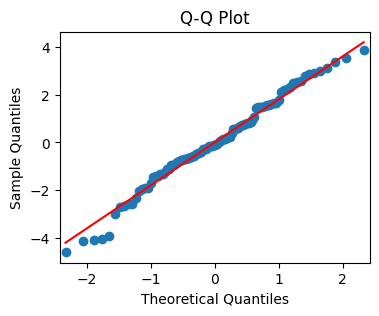

In [33]:
# Stats models
import statsmodels.api as sm

plt.figure(figsize=(4, 3)) 
sm.qqplot(errors, line='s', ax=plt.gca())  # 's' stands for standardized line
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

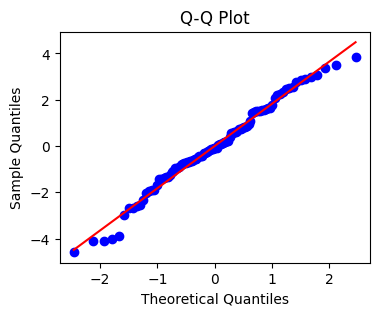

In [34]:
# Create a Q-Q plot using scipy.stats
plt.figure(figsize=(4, 3)) 
stats.probplot(errors, plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()



# Multicollinearity 

- why its a problem: if multiple predictors are correlated and in the same model, it can affect estimate of confidence interval and p-value calculation
- It is possible that the pairwise correlations are small, and yet a linear dependence exists among three or even more variables, for example, if X3 = 2X1 + 5X2 + error, say.
- tests to check:
    - variance inflation factor (we learned previously that the standard errors — and hence the variances — of the estimated coefficients are inflated when multicollinearity exists.)
    - VIF = $\frac{1}{1-R_{j}^2} $ <br>
    where $\R_{j}^2$ is the R2-value obtained by regressing the jth predictor on the remaining predictors. 
        - VIF < 1, no multicollinearity
        - VIF > 4, has multicollinearity
    

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate some example data
np.random.seed(42)
n = 100
x1 = np.random.rand(n)
x2 = 0.8 * x1 + 0.2 * np.random.rand(n) # generate a predictor x2 that is strongly correlated with x1 
x3 = 0.5 * x1 + 0.5 * x2 + 0.2 * np.random.rand(n) # generate a predictor x3 that is moderatly correlated with x1 
y = 2 * x1 + 3 * x2 + 4 * x3 + np.random.randn(n)

dt = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'X3': x3
})


In [48]:
dt2 = dt[['X1', 'X2', 'X3']]

In [52]:
type(dt)

pandas.core.frame.DataFrame

In [51]:
type(dt2)

pandas.core.frame.DataFrame

In [36]:
dt.head(3)

,X1,X2,X3
0,0.374540,0.305918,0.468635
1,0.950714,0.887854,0.936112
2,0.731994,0.648466,0.722556


In [37]:
dt = sm.add_constant(dt) 

In [38]:
type(dt)

pandas.core.frame.DataFrame

In [53]:
model = sm.OLS(y, dt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.35e-42
Time:                        16:05:51   Log-Likelihood:                -138.17
No. Observations:                 100   AIC:                             284.3
Df Residuals:                      96   BIC:                             294.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4000      0.328     -1.220      0.2

In [54]:
print(model.params)

const   -0.400028
X1       0.758360
X2       3.219378
X3       5.646741
dtype: float64


In [55]:
type(model.params)

pandas.core.series.Series

In [56]:
model.params.index

Index(['const', 'X1', 'X2', 'X3'], dtype='object')

In [58]:
data = {
    'Coefficient': model.params.index,
    'Coefficient Value': model.params.values,
    'P-Value': model.pvalues.values
}

In [59]:
data

{'Coefficient': Index(['const', 'X1', 'X2', 'X3'], dtype='object'),
 'Coefficient Value': array([-0.40002788,  0.75835994,  3.21937812,  5.64674092]),
 'P-Value': array([0.22533686, 0.66149697, 0.07528942, 0.00129891])}

In [60]:
dataPD = pd.DataFrame(data)

In [61]:
dataPD

,Coefficient,Coefficient Value,P-Value
0,const,-0.400028,0.225337
1,X1,0.758360,0.661497
2,X2,3.219378,0.075289
3,X3,5.646741,0.001299


In [65]:
vif = pd.DataFrame() # create an empty pandas dataframe

In [64]:
type(vif)

pandas.core.frame.DataFrame

In [102]:
dt.shape[1]

4

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate some example data
np.random.seed(42)
n = 100
x1 = np.random.rand(n)
x2 = 0.8 * x1 + 0.2 * np.random.rand(n) # generate a predictor x2 that is strongly correlated with x1 
x3 = 0.5 * x1 + 0.5 * x2 + 0.2 * np.random.rand(n) # generate a predictor x3 that is moderatly correlated with x1 
y = 2 * x1 + 3 * x2 + 4 * x3 + np.random.randn(n)

dt = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'X3': x3
})

dt = sm.add_constant(dt) 

# calculating VIF for each feature
vif['Variable'] = dt.columns
vif["VIF"] = [variance_inflation_factor(dt.values, i) for i in range(len(dt.columns))]

In [111]:
dt

,const,X1,X2,X3
0,1.0,0.374540,0.305918,0.468635
1,1.0,0.950714,0.887854,0.936112
2,1.0,0.731994,0.648466,0.722556
3,1.0,0.598658,0.580641,0.769361
4,1.0,0.156019,0.306328,0.352459
...,...,...,...,...
95,1.0,0.493796,0.464878,0.583786
96,1.0,0.522733,0.563377,0.697054
97,1.0,0.427541,0.521455,0.517662
98,1.0,0.025419,0.197753,0.236164


In [110]:
vif

,Variable,VIF
0,const,11.112919
1,X1,27.013038
2,X2,19.403437
3,X3,21.928897


# Ordinary least square

Solve for the value of b which minimizes this sum is called the OLS estimator for β.

B = (X<sup>T</sup> X)<sup>-1</sup> * X<sup>T</sup>y

Algebraically, we require there be no perfect multicollinearity between the explanatory variables (which would cause the gram matrix to have no inverse).

R<sup>2</sup> = 